In [39]:
%matplotlib inline
import tensorflow as tf
import keras

import numpy as np
import pandas as pd
import sklearn
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc 
from sklearn.metrics import classification_report

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D
from keras.layers import Embedding, LSTM, Input, TimeDistributed, SpatialDropout1D
from keras.models import Model

#import warnings filter - ignore all future warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [2]:
#Loading Data - User 1600
df_ap = pd.read_csv('/Users/Kevin/Files/Thinkful/Data Files/wisdm-dataset/raw/phone/accel/data_1600_accel_phone.txt',
                header = None, 
                names = ['subject_id', 'activity_code', 'time_stamp', 'x', 'y', 'z'])

df_gp = pd.read_csv('/Users/Kevin/Files/Thinkful/Data Files/wisdm-dataset/raw/phone/gyro/data_1600_gyro_phone.txt',
                header = None, 
                names = ['subject_id', 'activity_code', 'time_stamp', 'x', 'y', 'z'])

df_aw = pd.read_csv('/Users/Kevin/Files/Thinkful/Data Files/wisdm-dataset/raw/watch/accel/data_1600_accel_watch.txt',
                header = None, 
                names = ['subject_id', 'activity_code', 'time_stamp', 'x', 'y', 'z'])

df_gw = pd.read_csv('/Users/Kevin/Files/Thinkful/Data Files/wisdm-dataset/raw/watch/gyro/data_1600_gyro_watch.txt',
                header = None, 
                names = ['subject_id', 'activity_code', 'time_stamp', 'x', 'y', 'z'])

# deleting ';' that markes the end of each line
df_ap['z'] = df_ap['z'].str.replace(';', '')
df_gp['z'] = df_gp['z'].str.replace(';', '')
df_aw['z'] = df_aw['z'].str.replace(';', '')
df_gw['z'] = df_gw['z'].str.replace(';', '')

#changing 'z' column data type to float64
df_ap = df_ap.astype({'z': 'float64'})
df_gp = df_gp.astype({'z': 'float64'})
df_aw = df_aw.astype({'z': 'float64'})
df_gw = df_gw.astype({'z': 'float64'})

#adding data source type to data frame
df_ap['type'] = 'ap'
df_gp['type'] = 'gp'
df_aw['type'] = 'aw'
df_gw['type'] = 'gw'

In [3]:
# print(df_ap.info())
# print(df_gp.info())
# print(df_aw.info())
# print(df_gw.info())

In [4]:
df_ap.head()

,subject_id,activity_code,time_stamp,x,y,z,type
0,1600,A,252207666810782,-0.364761,8.793503,1.055084,ap
1,1600,A,252207717164786,-0.879730,9.768784,1.016998,ap
2,1600,A,252207767518790,2.001495,11.109070,2.619156,ap
3,1600,A,252207817872794,0.450623,12.651642,0.184555,ap
4,1600,A,252207868226798,-2.164352,13.928436,-4.422485,ap


In [5]:
df_phone = df_ap.append(df_gp)
df_watch = df_aw.append(df_gw)

df = df_phone.append(df_watch)

In [6]:
# df.info()
# df.head()

# Preprocessing data

In [7]:
#For MLP
TIME_STEPS = 6
STEP  = 12

segments = []
labels = []

for i in range(0, len(df) - TIME_STEPS, STEP):
    xs = np.asarray(df['x'][i: i + TIME_STEPS])
    ys = np.asarray(df['y'][i: i + TIME_STEPS])
    zs = np.asarray(df['z'][i: i + TIME_STEPS])
    label = stats.mode(df['activity_code'][i: i + TIME_STEPS])[0][0]
    segments.append([xs, ys, zs])
    labels.append(label)

In [8]:
# len(df)
# len(segments)
# len(labels)
# df.tail(20)
# segments[-1]
# labels[-1]
# seg = np.array(segments)
# seg.shape
# lab = np.array(labels)
# lab.shape

In [9]:
segments_mlp = np.asarray(segments, dtype= np.float32).reshape(len(segments), 18)
labels_mlp = np.asarray(pd.get_dummies(labels), dtype = np.float32)

In [10]:
# segments_transformed[0]
# labels_mlp.shape
# segments_mlp.shape

In [11]:
#creating x and y variables with training and test splits
x_var = segments_mlp
y_var = labels_mlp

x_train_mlp, x_test_mlp, y_train_mlp, y_test_mlp = train_test_split(x_var, y_var, test_size=0.20, random_state=1)

In [12]:
# For LSTM 
TIME_STEPS = 10
STEP  = 20

segments = []
labels = []

for i in range(0, len(df) - TIME_STEPS, STEP):
    xs = np.asarray(df['x'][i: i + TIME_STEPS])
    ys = np.asarray(df['y'][i: i + TIME_STEPS])
    zs = np.asarray(df['z'][i: i + TIME_STEPS])
    label = stats.mode(df['activity_code'][i: i + TIME_STEPS])[0][0]
    segments.append([xs, ys, zs])
    labels.append(label)

In [13]:
# segments[0]
# l = np.array(labels)
# l.shape
# s = np.array(segments)
# s.shape
# len(segments)
# len(segments[0])
# len(segments[0][0])
# print(x_train.shape)
# print(y_train.shape)
# print(x_test.shape)
# print(y_test.shape)

In [14]:
segments = np.asarray(segments, dtype= np.float32)
labels = np.asarray(pd.get_dummies(labels), dtype = np.float32)

In [15]:
#creating x and y variables with training and test splits
x_var = segments
y_var = labels

x_train, x_test, y_train, y_test = train_test_split(x_var, y_var, test_size=0.20, random_state=1)

# MLP Model

In [16]:
# Multi Layer Perceptron 
model = Sequential()

model.add(Dense(64
                , activation = 
                'relu'
                , input_shape = (18,)))
model.add(Dropout(0.05))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(18, activation='softmax'))

# Compile the model to put it all together.
model.compile(loss = 'categorical_crossentropy',
              optimizer =  
              'RMSprop'
              , metrics = ['accuracy'])


Train on 17296 samples, validate on 4325 samples
Epoch 1/150
17296/17296 [==============================] - 0s 27us/step - loss: 2.2120 - accuracy: 0.2631 - val_loss: 1.9637 - val_accuracy: 0.3542
Epoch 2/150
17296/17296 [==============================] - 0s 18us/step - loss: 1.8961 - accuracy: 0.3623 - val_loss: 1.8235 - val_accuracy: 0.4007
Epoch 3/150
17296/17296 [==============================] - 0s 18us/step - loss: 1.7685 - accuracy: 0.4044 - val_loss: 1.7094 - val_accuracy: 0.4127
Epoch 4/150
17296/17296 [==============================] - 0s 18us/step - loss: 1.6800 - accuracy: 0.4237 - val_loss: 1.6473 - val_accuracy: 0.4347
Epoch 5/150
17296/17296 [==============================] - 0s 18us/step - loss: 1.6174 - accuracy: 0.4440 - val_loss: 1.5942 - val_accuracy: 0.4666
Epoch 6/150
17296/17296 [==============================] - 0s 21us/step - loss: 1.5672 - accuracy: 0.4593 - val_loss: 1.5899 - val_accuracy: 0.4442
Epoch 7/150
17296/17296 [==============================] - 0s 

17296/17296 [==============================] - 0s 18us/step - loss: 1.0498 - accuracy: 0.6387 - val_loss: 1.2098 - val_accuracy: 0.5986
Epoch 55/150
17296/17296 [==============================] - 1s 32us/step - loss: 1.0375 - accuracy: 0.6395 - val_loss: 1.2290 - val_accuracy: 0.5956
Epoch 56/150
17296/17296 [==============================] - 1s 33us/step - loss: 1.0489 - accuracy: 0.6402 - val_loss: 1.2132 - val_accuracy: 0.6030
Epoch 57/150
17296/17296 [==============================] - 1s 33us/step - loss: 1.0387 - accuracy: 0.6377 - val_loss: 1.2215 - val_accuracy: 0.6032
Epoch 58/150
17296/17296 [==============================] - 1s 31us/step - loss: 1.0350 - accuracy: 0.6469 - val_loss: 1.2107 - val_accuracy: 0.6060
Epoch 59/150
17296/17296 [==============================] - 0s 20us/step - loss: 1.0322 - accuracy: 0.6457 - val_loss: 1.2166 - val_accuracy: 0.6062
Epoch 60/150
17296/17296 [==============================] - 0s 22us/step - loss: 1.0227 - accuracy: 0.6489 - val_loss: 

17296/17296 [==============================] - 0s 18us/step - loss: 0.8949 - accuracy: 0.6950 - val_loss: 1.2215 - val_accuracy: 0.6363
Epoch 110/150
17296/17296 [==============================] - 0s 20us/step - loss: 0.8825 - accuracy: 0.7014 - val_loss: 1.2207 - val_accuracy: 0.6363
Epoch 111/150
17296/17296 [==============================] - 0s 19us/step - loss: 0.8923 - accuracy: 0.6928 - val_loss: 1.2290 - val_accuracy: 0.6342
Epoch 112/150
17296/17296 [==============================] - 0s 18us/step - loss: 0.8856 - accuracy: 0.6966 - val_loss: 1.2232 - val_accuracy: 0.6384
Epoch 113/150
17296/17296 [==============================] - 0s 23us/step - loss: 0.8796 - accuracy: 0.6984 - val_loss: 1.2237 - val_accuracy: 0.6405
Epoch 114/150
17296/17296 [==============================] - 0s 19us/step - loss: 0.8855 - accuracy: 0.6970 - val_loss: 1.2324 - val_accuracy: 0.6314
Epoch 115/150
17296/17296 [==============================] - 0s 20us/step - loss: 0.8789 - accuracy: 0.6973 - val_

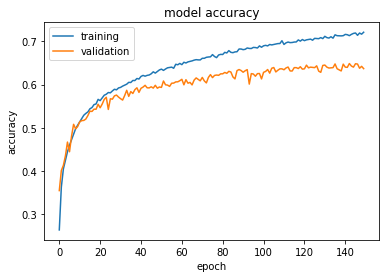

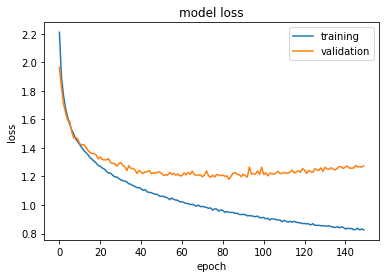

Test loss: 1.28
Test accuracy: 0.637


In [17]:
history = model.fit(x_train_mlp, y_train_mlp,
                    batch_size=256,
                    epochs=150,
                    verbose=1,
                    validation_data=(x_test_mlp, y_test_mlp))

loss, accuracy = model.evaluate(x_test_mlp, y_test_mlp, verbose=0)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

# LSTM Model 

In [18]:
#LSTM - Long Short Term Memory - simple
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(len(segments[0]), len(segments[0][0]))))
model.add(Dropout(0.1))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(18, activation='softmax'))


model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics = ['accuracy'])

Train on 10378 samples, validate on 2595 samples
Epoch 1/150
10378/10378 [==============================] - 1s 102us/step - loss: 2.3233 - accuracy: 0.2201 - val_loss: 2.1137 - val_accuracy: 0.2524
Epoch 2/150
10378/10378 [==============================] - 1s 64us/step - loss: 1.9109 - accuracy: 0.3329 - val_loss: 1.7798 - val_accuracy: 0.3719
Epoch 3/150
10378/10378 [==============================] - 1s 61us/step - loss: 1.7410 - accuracy: 0.3894 - val_loss: 1.6341 - val_accuracy: 0.4235
Epoch 4/150
10378/10378 [==============================] - 1s 92us/step - loss: 1.6267 - accuracy: 0.4296 - val_loss: 1.5669 - val_accuracy: 0.4570
Epoch 5/150
10378/10378 [==============================] - 1s 65us/step - loss: 1.5517 - accuracy: 0.4592 - val_loss: 1.5486 - val_accuracy: 0.4728
Epoch 6/150
10378/10378 [==============================] - 1s 62us/step - loss: 1.4954 - accuracy: 0.4768 - val_loss: 1.5319 - val_accuracy: 0.4717
Epoch 7/150
10378/10378 [==============================] - 1s 

Epoch 56/150
10378/10378 [==============================] - 1s 57us/step - loss: 0.9139 - accuracy: 0.6809 - val_loss: 1.2781 - val_accuracy: 0.6370
Epoch 57/150
10378/10378 [==============================] - 1s 53us/step - loss: 0.9076 - accuracy: 0.6888 - val_loss: 1.3512 - val_accuracy: 0.6389
Epoch 58/150
10378/10378 [==============================] - 1s 65us/step - loss: 0.9003 - accuracy: 0.6891 - val_loss: 1.2446 - val_accuracy: 0.6486
Epoch 59/150
10378/10378 [==============================] - 1s 58us/step - loss: 0.8878 - accuracy: 0.6924 - val_loss: 1.2738 - val_accuracy: 0.6609
Epoch 60/150
10378/10378 [==============================] - 1s 61us/step - loss: 0.8872 - accuracy: 0.6945 - val_loss: 1.2494 - val_accuracy: 0.6559
Epoch 61/150
10378/10378 [==============================] - 1s 61us/step - loss: 0.8759 - accuracy: 0.6936 - val_loss: 1.2989 - val_accuracy: 0.6455
Epoch 62/150
10378/10378 [==============================] - 1s 54us/step - loss: 0.8823 - accuracy: 0.6971

Epoch 111/150
10378/10378 [==============================] - 1s 59us/step - loss: 0.7238 - accuracy: 0.7500 - val_loss: 1.3950 - val_accuracy: 0.6690
Epoch 112/150
10378/10378 [==============================] - 1s 65us/step - loss: 0.7211 - accuracy: 0.7533 - val_loss: 1.4048 - val_accuracy: 0.6690
Epoch 113/150
10378/10378 [==============================] - 1s 115us/step - loss: 0.7224 - accuracy: 0.7473 - val_loss: 1.3584 - val_accuracy: 0.6694
Epoch 114/150
10378/10378 [==============================] - 1s 92us/step - loss: 0.7175 - accuracy: 0.7504 - val_loss: 1.4225 - val_accuracy: 0.6528
Epoch 115/150
10378/10378 [==============================] - 1s 84us/step - loss: 0.7150 - accuracy: 0.7510 - val_loss: 1.4255 - val_accuracy: 0.6663
Epoch 116/150
10378/10378 [==============================] - 1s 76us/step - loss: 0.7017 - accuracy: 0.7565 - val_loss: 1.5218 - val_accuracy: 0.6516
Epoch 117/150
10378/10378 [==============================] - 1s 101us/step - loss: 0.7110 - accurac

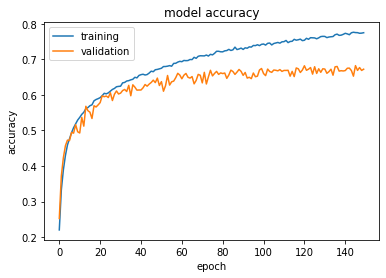

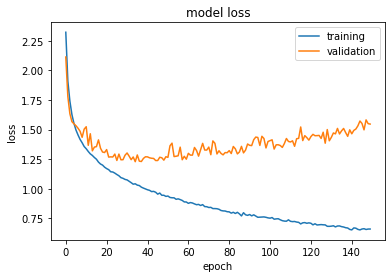

Test loss: 1.55
Test accuracy: 0.672


In [19]:
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=150,
                    verbose=1,
                    validation_data=(x_test, y_test))

loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

# LSTM Model Variant - with Return Sequences

In [20]:
#LSTM - Long Short Term Memory - 2
model = Sequential()
model.add(LSTM(18, activation='relu', input_shape=(len(segments[0]), len(segments[0][0])), return_sequences=True))
model.add(LSTM(64, activation='relu', return_sequences=True))
model.add(LSTM(18, activation='relu', return_sequences=True))
model.add(LSTM(64, activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(18, activation='softmax'))

model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics = ['accuracy'])

Train on 10378 samples, validate on 2595 samples
Epoch 1/150
10378/10378 [==============================] - 3s 256us/step - loss: 2.7481 - accuracy: 0.1071 - val_loss: 2.5749 - val_accuracy: 0.1468
Epoch 2/150
10378/10378 [==============================] - 1s 105us/step - loss: 2.3445 - accuracy: 0.2047 - val_loss: 2.3083 - val_accuracy: 0.2139
Epoch 3/150
10378/10378 [==============================] - 1s 139us/step - loss: 2.1218 - accuracy: 0.2710 - val_loss: 2.2118 - val_accuracy: 0.2690
Epoch 4/150
10378/10378 [==============================] - 1s 110us/step - loss: 1.9402 - accuracy: 0.3417 - val_loss: 2.2087 - val_accuracy: 0.2967
Epoch 5/150
10378/10378 [==============================] - 1s 109us/step - loss: 1.8034 - accuracy: 0.3910 - val_loss: 2.1793 - val_accuracy: 0.3183
Epoch 6/150
10378/10378 [==============================] - 1s 120us/step - loss: 1.7177 - accuracy: 0.4110 - val_loss: 1.9612 - val_accuracy: 0.3553
Epoch 7/150
10378/10378 [==============================] 

10378/10378 [==============================] - 1s 122us/step - loss: 1.0167 - accuracy: 0.6390 - val_loss: 1.5623 - val_accuracy: 0.5426
Epoch 56/150
10378/10378 [==============================] - 1s 136us/step - loss: 1.0086 - accuracy: 0.6393 - val_loss: 1.4642 - val_accuracy: 0.5622
Epoch 57/150
10378/10378 [==============================] - 2s 164us/step - loss: 1.0032 - accuracy: 0.6415 - val_loss: 1.4688 - val_accuracy: 0.5800
Epoch 58/150
10378/10378 [==============================] - 1s 117us/step - loss: 0.9999 - accuracy: 0.6470 - val_loss: 1.5237 - val_accuracy: 0.5445
Epoch 59/150
10378/10378 [==============================] - 1s 121us/step - loss: 0.9914 - accuracy: 0.6460 - val_loss: 1.5297 - val_accuracy: 0.5638
Epoch 60/150
10378/10378 [==============================] - 1s 121us/step - loss: 0.9901 - accuracy: 0.6489 - val_loss: 1.4974 - val_accuracy: 0.5869
Epoch 61/150
10378/10378 [==============================] - 1s 102us/step - loss: 0.9827 - accuracy: 0.6515 - val

10378/10378 [==============================] - 1s 97us/step - loss: 0.8184 - accuracy: 0.7133 - val_loss: 1.9940 - val_accuracy: 0.5850
Epoch 110/150
10378/10378 [==============================] - 1s 95us/step - loss: 0.8110 - accuracy: 0.7122 - val_loss: 2.0652 - val_accuracy: 0.5568
Epoch 111/150
10378/10378 [==============================] - 1s 97us/step - loss: 0.8214 - accuracy: 0.7115 - val_loss: 1.7645 - val_accuracy: 0.5973
Epoch 112/150
10378/10378 [==============================] - 1s 96us/step - loss: 0.8138 - accuracy: 0.7119 - val_loss: 1.8516 - val_accuracy: 0.5834
Epoch 113/150
10378/10378 [==============================] - 1s 96us/step - loss: 0.8061 - accuracy: 0.7166 - val_loss: 1.7648 - val_accuracy: 0.5946
Epoch 114/150
10378/10378 [==============================] - 1s 96us/step - loss: 0.8165 - accuracy: 0.7132 - val_loss: 1.7504 - val_accuracy: 0.5954
Epoch 115/150
10378/10378 [==============================] - 1s 97us/step - loss: 0.8105 - accuracy: 0.7167 - val_

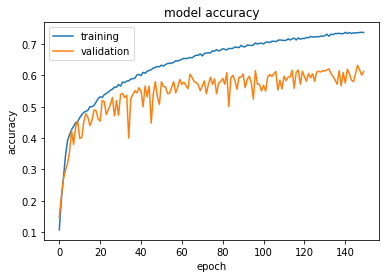

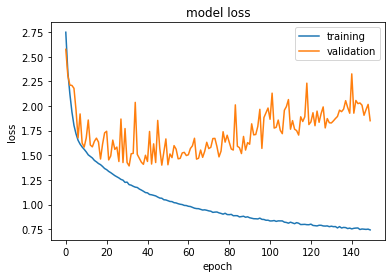

Test loss: 1.85
Test accuracy: 0.613


In [21]:
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=150,
                    verbose=1,
                    validation_data=(x_test, y_test))

loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

# LSTM Model Variant - Learning Rate Change

In [30]:
from keras.optimizers import SGD

act = 'relu'

#LSTM - Long Short Term Memory - 3
model = Sequential()
model.add(LSTM(18, activation=act, input_shape=(len(segments[0]), len(segments[0][0])), return_sequences=True))
model.add(LSTM(32, activation=act, return_sequences=True))
model.add(LSTM(64, activation=act, return_sequences=True))
model.add(LSTM(32, activation=act))
# model.add(Dropout(0.1))
model.add(Dense(18, activation='softmax'))

opt = SGD(lr = .05)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ['accuracy'])

Train on 10378 samples, validate on 2595 samples
Epoch 1/150
10378/10378 [==============================] - 2s 241us/step - loss: 2.8900 - accuracy: 0.0601 - val_loss: 2.8900 - val_accuracy: 0.0466
Epoch 2/150
10378/10378 [==============================] - 1s 97us/step - loss: 2.8895 - accuracy: 0.0630 - val_loss: 2.8903 - val_accuracy: 0.0466
Epoch 3/150
10378/10378 [==============================] - 1s 107us/step - loss: 2.8892 - accuracy: 0.0630 - val_loss: 2.8904 - val_accuracy: 0.0466
Epoch 4/150
10378/10378 [==============================] - 1s 96us/step - loss: 2.8889 - accuracy: 0.0630 - val_loss: 2.8906 - val_accuracy: 0.0466
Epoch 5/150
10378/10378 [==============================] - 1s 109us/step - loss: 2.8886 - accuracy: 0.0630 - val_loss: 2.8905 - val_accuracy: 0.0466
Epoch 6/150
10378/10378 [==============================] - 1s 99us/step - loss: 2.8884 - accuracy: 0.0630 - val_loss: 2.8904 - val_accuracy: 0.0466
Epoch 7/150
10378/10378 [==============================] - 1

10378/10378 [==============================] - 1s 101us/step - loss: 1.5292 - accuracy: 0.4601 - val_loss: 1.6892 - val_accuracy: 0.4231
Epoch 56/150
10378/10378 [==============================] - 1s 93us/step - loss: 1.4807 - accuracy: 0.4771 - val_loss: 1.7121 - val_accuracy: 0.4455
Epoch 57/150
10378/10378 [==============================] - 1s 93us/step - loss: 1.4606 - accuracy: 0.4898 - val_loss: 1.7879 - val_accuracy: 0.4031
Epoch 58/150
10378/10378 [==============================] - 1s 91us/step - loss: 1.4704 - accuracy: 0.4870 - val_loss: 1.9718 - val_accuracy: 0.3888
Epoch 59/150
10378/10378 [==============================] - 1s 92us/step - loss: 1.4574 - accuracy: 0.4945 - val_loss: 2.3580 - val_accuracy: 0.3464
Epoch 60/150
10378/10378 [==============================] - 1s 93us/step - loss: 1.4822 - accuracy: 0.4854 - val_loss: 1.6190 - val_accuracy: 0.4443
Epoch 61/150
10378/10378 [==============================] - 1s 93us/step - loss: 1.4156 - accuracy: 0.5055 - val_loss:

Epoch 110/150
10378/10378 [==============================] - 1s 120us/step - loss: 1.1359 - accuracy: 0.6028 - val_loss: 1.4804 - val_accuracy: 0.5218
Epoch 111/150
10378/10378 [==============================] - 1s 118us/step - loss: 1.1314 - accuracy: 0.6028 - val_loss: 1.7996 - val_accuracy: 0.4432
Epoch 112/150
10378/10378 [==============================] - 1s 104us/step - loss: 1.2114 - accuracy: 0.5789 - val_loss: 2.0305 - val_accuracy: 0.4509
Epoch 113/150
10378/10378 [==============================] - 1s 97us/step - loss: 1.1781 - accuracy: 0.5886 - val_loss: 2.6112 - val_accuracy: 0.3634
Epoch 114/150
10378/10378 [==============================] - 1s 95us/step - loss: 1.2085 - accuracy: 0.5795 - val_loss: 1.8015 - val_accuracy: 0.4593
Epoch 115/150
10378/10378 [==============================] - 1s 94us/step - loss: 1.1711 - accuracy: 0.5936 - val_loss: 1.4243 - val_accuracy: 0.5322
Epoch 116/150
10378/10378 [==============================] - 1s 93us/step - loss: 1.1659 - accura

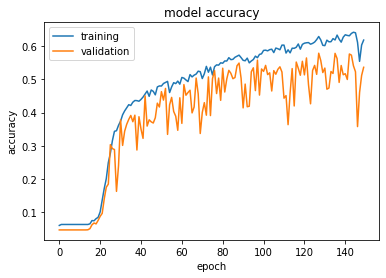

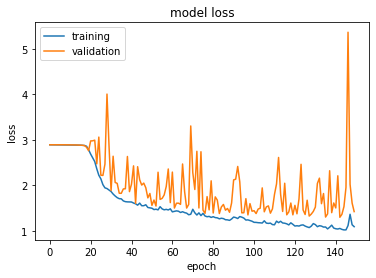

Test loss: 1.42
Test accuracy: 0.536


In [31]:
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=150,
                    verbose=1,
                    validation_data=(x_test, y_test))

loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

# LSTM Model Variant - Batch Size Change

In [51]:
#LSTM - Long Short Term Memory - simple
model = Sequential()
model.add(LSTM(64,
               activation='relu',
               input_shape=(len(segments[0]),len(segments[0][0]))
              ))
model.add(Dropout(0.1))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(18, activation='softmax'))


model.compile(optimizer='RMSprop',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

Train on 10378 samples, validate on 2595 samples
Epoch 1/150
10378/10378 [==============================] - 3s 277us/step - loss: 2.1699 - accuracy: 0.2577 - val_loss: 1.8076 - val_accuracy: 0.3595
Epoch 2/150
10378/10378 [==============================] - 3s 316us/step - loss: 1.7098 - accuracy: 0.3955 - val_loss: 1.6230 - val_accuracy: 0.4374
Epoch 3/150
10378/10378 [==============================] - 2s 237us/step - loss: 1.5794 - accuracy: 0.4424 - val_loss: 1.5046 - val_accuracy: 0.4694
Epoch 4/150
10378/10378 [==============================] - 2s 163us/step - loss: 1.4921 - accuracy: 0.4782 - val_loss: 1.4319 - val_accuracy: 0.5156
Epoch 5/150
10378/10378 [==============================] - 2s 216us/step - loss: 1.4361 - accuracy: 0.5013 - val_loss: 1.3932 - val_accuracy: 0.5233
Epoch 6/150
10378/10378 [==============================] - 2s 185us/step - loss: 1.3884 - accuracy: 0.5218 - val_loss: 1.4083 - val_accuracy: 0.5260
Epoch 7/150
10378/10378 [==============================] 

10378/10378 [==============================] - 2s 169us/step - loss: 0.8398 - accuracy: 0.7194 - val_loss: 1.5876 - val_accuracy: 0.6478
Epoch 56/150
10378/10378 [==============================] - 2s 204us/step - loss: 0.8401 - accuracy: 0.7222 - val_loss: 1.5091 - val_accuracy: 0.6617
Epoch 57/150
10378/10378 [==============================] - 2s 183us/step - loss: 0.8242 - accuracy: 0.7171 - val_loss: 1.5448 - val_accuracy: 0.6509
Epoch 58/150
10378/10378 [==============================] - 2s 159us/step - loss: 0.8214 - accuracy: 0.7246 - val_loss: 1.5250 - val_accuracy: 0.6462
Epoch 59/150
10378/10378 [==============================] - 2s 192us/step - loss: 0.8064 - accuracy: 0.7208 - val_loss: 1.6789 - val_accuracy: 0.6459
Epoch 60/150
10378/10378 [==============================] - 2s 185us/step - loss: 0.7981 - accuracy: 0.7252 - val_loss: 1.5219 - val_accuracy: 0.6620
Epoch 61/150
10378/10378 [==============================] - 2s 199us/step - loss: 0.8054 - accuracy: 0.7298 - val

10378/10378 [==============================] - 2s 171us/step - loss: 0.7029 - accuracy: 0.7736 - val_loss: 1.8160 - val_accuracy: 0.6767
Epoch 110/150
10378/10378 [==============================] - 2s 204us/step - loss: 0.7269 - accuracy: 0.7675 - val_loss: 1.8687 - val_accuracy: 0.6686
Epoch 111/150
10378/10378 [==============================] - 2s 158us/step - loss: 0.7030 - accuracy: 0.7763 - val_loss: 1.8893 - val_accuracy: 0.6744
Epoch 112/150
10378/10378 [==============================] - 2s 184us/step - loss: 0.7342 - accuracy: 0.7687 - val_loss: 1.9586 - val_accuracy: 0.6501
Epoch 113/150
10378/10378 [==============================] - 2s 180us/step - loss: 0.7194 - accuracy: 0.7735 - val_loss: 1.8715 - val_accuracy: 0.6628
Epoch 114/150
10378/10378 [==============================] - 2s 185us/step - loss: 0.7211 - accuracy: 0.7738 - val_loss: 1.8715 - val_accuracy: 0.6543
Epoch 115/150
10378/10378 [==============================] - 2s 188us/step - loss: 0.7004 - accuracy: 0.7737

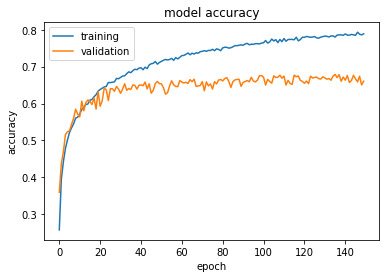

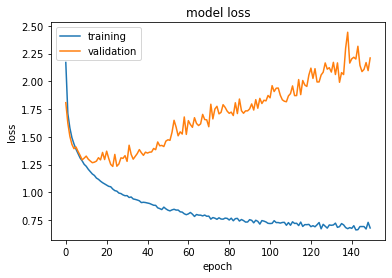

Test loss: 2.21
Test accuracy: 0.661


In [52]:
history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=150,
                    verbose=1,
                    validation_data=(x_test, y_test))

loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')